In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Toro 2009, 212, 215 (193), Начальные данные -- лекция 6

In [3]:
#A+ = [[a rho0] [a^2/rho0 a]]

In [4]:
def little_water(u_0, x_0, x_1, a, rho_0, T, sigma):
    
    n_x = u_0.shape[1]
    
    A = np.array([[0, rho_0], 
                  [a ** 2/ rho_0, 0]])
    
    A_mod = np.array([[a, 0],
                      [0, a]])

    x = np.linspace(x_0, x_1, n_x)
    dx = x[1] - x[0]
    
    u = np.copy(u_0)
    u_n = np.copy(u_0)
    
    fluxes = np.zeros((2, n_x - 1))
    
    dt = sigma * dx / a
    t = 0
    while t < T:
        fluxes = 0.5 * (np.dot(A, (u[:, :-1] + u[:, 1:])) - np.dot(A_mod, (u[:, 1:] - u[:, :-1])))
        u_n[:,1:-1] = u[:, 1:-1] + dt/dx*(fluxes[:,:-1]-fluxes[:,1:])
        u_n[:,0] = u_n[:,1]
        u_n[:,-1] = u_n[:,-2]
        u = np.copy(u_n)
        t = t + dt

    plt.figure(figsize=(8, 6))
    plt.ylim(0, 1.1)
    plt.xlim(-2.1, 2.1)
    plt.plot(x, u_n[0], '-o', label = r'$\rho$');
    plt.plot(x, u_n[1], '-o', label = r'$u$')
    plt.legend(loc='best')
    plt.grid()

In [5]:
x_0 = -2
x_1 = 2
n_x = 81

x = np.linspace(x_0, x_1, n_x)

u = np.zeros((2, n_x))

rho_l = 1.0
rho_r = 0.5

u_l = 0.0
u_r = 0.0

u[0, x<=0] = rho_l
u[1, x<=0] = u_l
u[0, x>0] = rho_r
u[1, x>0] = u_r

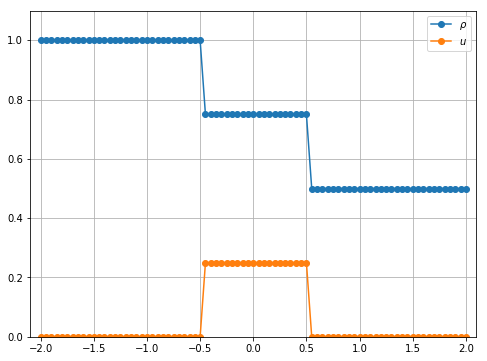

In [8]:
little_water(u, -2, 2, 1, 1, 0.5, 1)